In [1]:
import pandas as pd

In [2]:
dsViaturas = pd.read_csv('viaturas.csv')
dsViaturas.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7563 entries, 0 to 7562
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   alteracoes    7563 non-null   object 
 1   com_problema  3349 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.3+ KB


In [3]:
dsViaturas.head(15)

,alteracoes,com_problema
0,nc,0.0
1,conforme pdi anterior,0.0
2,painel informando a necessidade de troca de oleo,1.0
3,sa,0.0
4,sem alteracoes visiveis,0.0
5,s a,0.0
6,nao,0.0
7,viatura com ruido ao acelerar nas retomadas a ...,1.0
8,ar condicionado sem eficiencia,0.0
9,ar condicionado com problemas nao gela,0.0


In [4]:
print("Quantidade de valores em branco, por variável:")
dsViaturas.isna().sum()

Quantidade de valores em branco, por variável:


alteracoes         0
com_problema    4214
dtype: int64

In [5]:
dsViaturas = dsViaturas.dropna()
dsViaturas

,alteracoes,com_problema
0,nc,0.0
1,conforme pdi anterior,0.0
2,painel informando a necessidade de troca de oleo,1.0
3,sa,0.0
4,sem alteracoes visiveis,0.0
...,...,...
7558,vtr encaminhada para troca de oleo e filtros,0.0
7559,vidros traseiro nao abrem,0.0
7560,idem pd anterior,0.0
7561,km diferente da pdi viatura levada para a conc...,0.0


In [6]:
print("Quantidade de valores em branco, por variável:")
dsViaturas.isna().sum()

Quantidade de valores em branco, por variável:


alteracoes      0
com_problema    0
dtype: int64

In [7]:
dsViaturas['com_problema'].value_counts()

0.0    1773
1.0    1576
Name: com_problema, dtype: int64

In [8]:
#mudando o tipo de dados do y para int
dsViaturas['com_problema'] = dsViaturas['com_problema'].astype(int)

In [9]:
dsViaturas['com_problema'].value_counts(normalize=True)

0    0.529412
1    0.470588
Name: com_problema, dtype: float64

In [10]:
X = dsViaturas.iloc[:,0]
X

0                                                      nc
1                                   conforme pdi anterior
2        painel informando a necessidade de troca de oleo
3                                                      sa
4                                 sem alteracoes visiveis
                              ...                        
7558         vtr encaminhada para troca de oleo e filtros
7559                            vidros traseiro nao abrem
7560                                     idem pd anterior
7561    km diferente da pdi viatura levada para a conc...
7562    vidros travando para subir farol direito queim...
Name: alteracoes, Length: 3349, dtype: object

In [11]:
y = dsViaturas.iloc[:,1]
y

0       0
1       0
2       1
3       0
4       0
       ..
7558    0
7559    0
7560    0
7561    0
7562    0
Name: com_problema, Length: 3349, dtype: int32

In [12]:
y.isna().sum()

0

In [13]:
# Dividir o dataset entre treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train

1090    retrovisor direito da viatura danificado sem o...
4986    viatura recebida suja contudo estamos passando...
318                      luz de busca esquerda inoperante
59                                                 nao ha
829               para choque traseiro com pequenos danos
                              ...                        
1095                         viatura sem estepe funcional
1130                                        capu amassado
1294       vtr nao utilizada no plantao do dia 21 02 2021
860                         farol baixo esquerdo queimado
7388    vazamento de qav no sistema quando a bomba e a...
Name: alteracoes, Length: 2679, dtype: object

In [14]:
y_train

1090    0
4986    1
318     0
59      0
829     0
       ..
1095    1
1130    0
1294    0
860     0
7388    1
Name: com_problema, Length: 2679, dtype: int32

In [15]:
#versão com a pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
#TODO: substituir pelo tfidfVectorizer
text_clf = Pipeline([
    #('vect', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

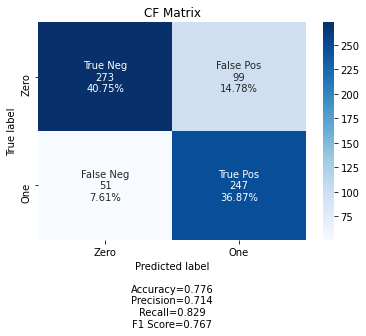

In [28]:
# mostrar matrix de confusão
import ds_util as util
cfm_01 = util.getConfusionMatrixHeatMap(text_clf, X_test, y_test);
cfm_01;

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_new_counts = count_vect.fit_transform(X)
X_new_counts.shape

(3349, 4377)

In [18]:

tfidf_transformer = TfidfTransformer()
X_new_tfidf = tfidf_transformer.fit_transform(X_new_counts, y=y)
X_new_tfidf.shape
print(type(X_new_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


In [19]:
dfViaturas = pd.DataFrame(X_new_tfidf.toarray())
dfViaturas['y'] = y
dfViaturas

,0,1,2,3,4,5,6,7,8,9,...,4368,4369,4370,4371,4372,4373,4374,4375,4376,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [20]:
#excluindo NaN values
dfViaturas = dfViaturas.dropna()
dfViaturas

,0,1,2,3,4,5,6,7,8,9,...,4368,4369,4370,4371,4372,4373,4374,4375,4376,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
#mudando o tipo de dados do y para int
dfViaturas['y'] = dfViaturas['y'].astype(int)
dfViaturas

C:\Users\PRF\AppData\Local\Temp/ipykernel_10584/2970775030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfViaturas['y'] = dfViaturas['y'].astype(int)


,0,1,2,3,4,5,6,7,8,9,...,4368,4369,4370,4371,4372,4373,4374,4375,4376,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [22]:
dfViaturas.to_csv('viaturas4Model.csv')

In [23]:
from autoML import AutoML
from multiprocessing import Pool

pool = Pool(processes=10)
automl = AutoML(dfViaturas, 'y', min_x_y_correlation_rate=0.05, pool=pool)
automl.getResults()

Original dataset dimensions: (1984, 4378)
Dataset dimensions after drop NaN values: (1984, 4378)
ML problem type: Classification
   Applied metrics: ['f1', 'accuracy', 'roc_auc']
Normalizing the variables...
Splitting dataset...
   X_train dimensions: (1587, 4377)
Features engineering - Testing correlation with Y...
   Features engineering - Features reduction after correlation test with Y: 95.09% (215 remained)
Features engineering - Testing redudance between features...
   Features engineering - Features reduction after redudance test: 95.16% (212 remained)
Selected algorithms: ['KNeighborsClassifier', 'SVC', 'GaussianProcessClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'MLPClassifier', 'AdaBoostClassifier', 'GaussianNB', 'QuadraticDiscriminantAnalysis', 'XGBClassifier', 'LogisticRegression']
Nº of training possible combinations: 1.4480440104427434e+65 (1.3164036458570394e+64 features combinations, 11 algorithms)
   *Model trained: f1 = 0.58647 | 212 features | KNe

,train_order,algorithm,features,n_features,train_time,mem_max,f1,accuracy,roc_auc,confusion_matrix
0,51,SVC(probability=True),"(4275, 4258, 4251, 4223, 4196, 4195, 4180, 416...",201,14.681190,711.847656,0.769837,0.822596,0.867039,"[[188, 50], [43, 116]]"
1,55,SVC(probability=True),"(4275, 4274, 4258, 4251, 4223, 4196, 4195, 418...",205,28.612377,708.656250,0.769081,0.822591,0.868547,"[[188, 50], [41, 118]]"
2,46,SVC(probability=True),"(4275, 4258, 4251, 4223, 4196, 4195, 4180, 416...",200,13.704409,708.765625,0.768261,0.821587,0.865953,"[[188, 50], [43, 116]]"
3,34,SVC(probability=True),"(4275, 4274, 4258, 4251, 4223, 4196, 4195, 418...",205,25.263185,708.660156,0.765872,0.822578,0.871997,"[[193, 45], [43, 116]]"
4,20,SVC(probability=True),"(4275, 4274, 4258, 4251, 4223, 4196, 4195, 418...",208,41.888463,707.812500,0.765237,0.821572,0.872467,"[[191, 47], [43, 116]]"
...,...,...,...,...,...,...,...,...,...,...
58,16,QuadraticDiscriminantAnalysis(),"(4275, 4274, 4258, 4251, 4223, 4196, 4195, 416...",188,5.312883,724.714844,0.595921,0.756541,0.866732,"[[207, 31], [75, 84]]"
59,62,KNeighborsClassifier(n_neighbors=3),"(4274, 4258, 4251, 4223, 4196, 4195, 4180, 416...",194,1.818118,711.140625,0.589444,0.735385,0.757241,"[[206, 32], [77, 82]]"
60,0,KNeighborsClassifier(n_neighbors=3),"(4275, 4274, 4258, 4251, 4223, 4196, 4195, 418...",212,5.709309,655.871094,0.586466,0.736393,0.757847,"[[209, 29], [85, 74]]"
61,3,DecisionTreeClassifier(max_depth=5),"(4275, 4274, 4258, 4251, 4223, 4196, 4195, 418...",212,1.603222,775.671875,0.472174,0.704642,0.658720,"[[232, 6], [111, 48]]"


In [25]:
automl.getResults().head(25)

,train_order,algorithm,features,n_features,train_time,mem_max,f1,accuracy,roc_auc,confusion_matrix
0,51,SVC(probability=True),"(4275, 4258, 4251, 4223, 4196, 4195, 4180, 416...",201,14.681190,711.847656,0.769837,0.822596,0.867039,"[[188, 50], [43, 116]]"
1,55,SVC(probability=True),"(4275, 4274, 4258, 4251, 4223, 4196, 4195, 418...",205,28.612377,708.656250,0.769081,0.822591,0.868547,"[[188, 50], [41, 118]]"
2,46,SVC(probability=True),"(4275, 4258, 4251, 4223, 4196, 4195, 4180, 416...",200,13.704409,708.765625,0.768261,0.821587,0.865953,"[[188, 50], [43, 116]]"
3,34,SVC(probability=True),"(4275, 4274, 4258, 4251, 4223, 4196, 4195, 418...",205,25.263185,708.660156,0.765872,0.822578,0.871997,"[[193, 45], [43, 116]]"
4,20,SVC(probability=True),"(4275, 4274, 4258, 4251, 4223, 4196, 4195, 418...",208,41.888463,707.812500,0.765237,0.821572,0.872467,"[[191, 47], [43, 116]]"
5,1,SVC(probability=True),"(4275, 4274, 4258, 4251, 4223, 4196, 4195, 418...",212,113.839368,661.292969,0.764805,0.820567,0.872524,"[[194, 44], [45, 114]]"
6,42,SVC(probability=True),"(4275, 4258, 4251, 4223, 4196, 4195, 4180, 416...",201,13.907658,709.484375,0.764481,0.821575,0.871337,"[[193, 45], [43, 116]]"
7,43,SVC(probability=True),"(4275, 4274, 4258, 4251, 4223, 4196, 4195, 418...",202,13.816579,708.851562,0.764389,0.819061,0.866642,"[[188, 50], [41, 118]]"
8,36,SVC(probability=True),"(4275, 4258, 4251, 4223, 4196, 4195, 4180, 416...",198,14.710878,708.660156,0.763679,0.818058,0.864538,"[[190, 48], [43, 116]]"
9,50,SVC(probability=True),"(4275, 4274, 4258, 4251, 4223, 4196, 4195, 418...",200,16.194569,711.859375,0.763492,0.819060,0.866253,"[[189, 49], [40, 119]]"


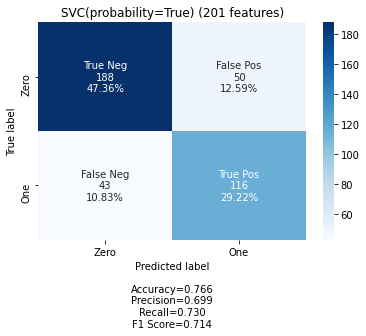

In [26]:
automl.getBestConfusionMatrix()